In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASETS

In [14]:
data1 = pd.read_csv('C:/Users/alwin/Downloads/uad/archive/02-14-2018.csv')
data2 = pd.read_csv('C:/Users/alwin/Downloads/uad/archive/03-01-2018.csv')
data3 = pd.read_csv('C:/Users/alwin/Downloads/uad/archive/03-02-2018.csv')

C:\Users\harik\AppData\Local\Temp\ipykernel_2852\3287293341.py:2: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('C:/Users/harik/Downloads/uad/archive/03-01-2018.csv')


# Dataset General Descriptions
1. Head
2. Shape
3. Summary
4. Categorical Features
5. Fequency distribution
6. Specific Features
7. Column Names
8. Finding missing values

# DATA 1 PROCESSING 02-14-2018

In [15]:
data1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [16]:
data1.shape

(1048575, 80)

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [18]:
# Identify categorical features in the dataset - Columns with datatype object
categorical_features = data1.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Timestamp', 'Label']

In [19]:
data1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [20]:
data1[['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [21]:
data1.drop(columns='Timestamp', inplace=True)

<Axes: xlabel='Label'>

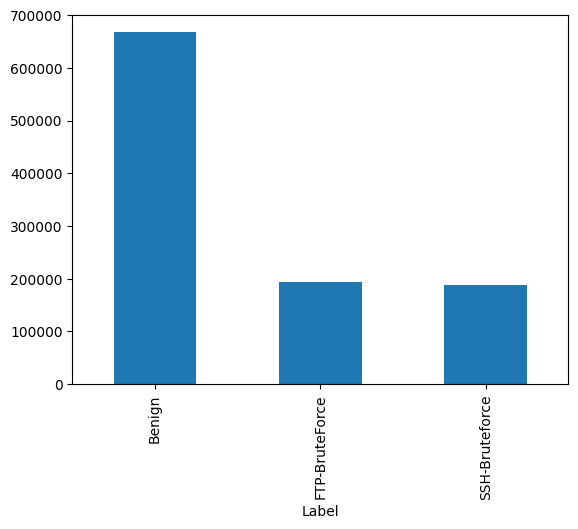

In [22]:
data1.Label.value_counts().plot.bar()

In [23]:
data1.replace(to_replace=['FTP-BruteForce', 'SSH-Bruteforce', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
                'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Infilteration', 'Bot'],
           value = 'Anomaly', inplace=True)

<Axes: xlabel='Label'>

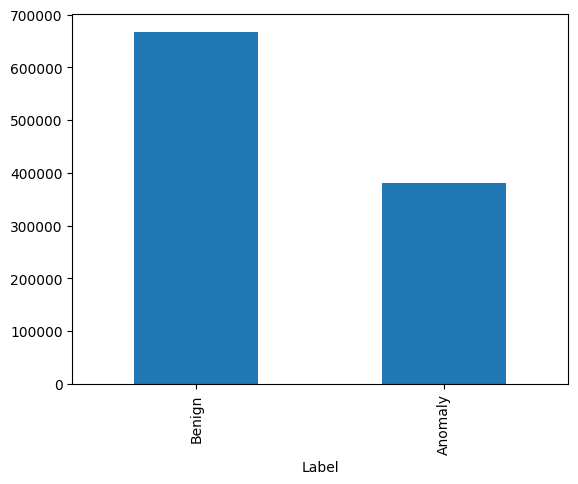

In [24]:
data1.Label.value_counts().plot.bar()

In [25]:
data1.Label.value_counts()

Label
Benign     667626
Anomaly    380949
Name: count, dtype: int64

In [26]:
data1.shape

(1048575, 79)

In [27]:
mask10 = data1[data1['Label'] == 'Benign'].reset_index(drop=True)
mask11 = data1[data1['Label'] == 'Anomaly'].reset_index(drop=True)

In [28]:
mask10  = mask10.sample(frac=1, random_state=40).reset_index(drop=True)
mask10_new = mask10.drop(mask10.index[1:177627], axis=0).reset_index(drop=True)

mask11  = mask11.sample(frac=1, random_state=40).reset_index(drop=True)
mask11_new = mask11.drop(mask11.index[1:170950], axis=0).reset_index(drop=True)

data1new= pd.concat([mask10_new, mask11_new], axis=0).reset_index(drop=True)

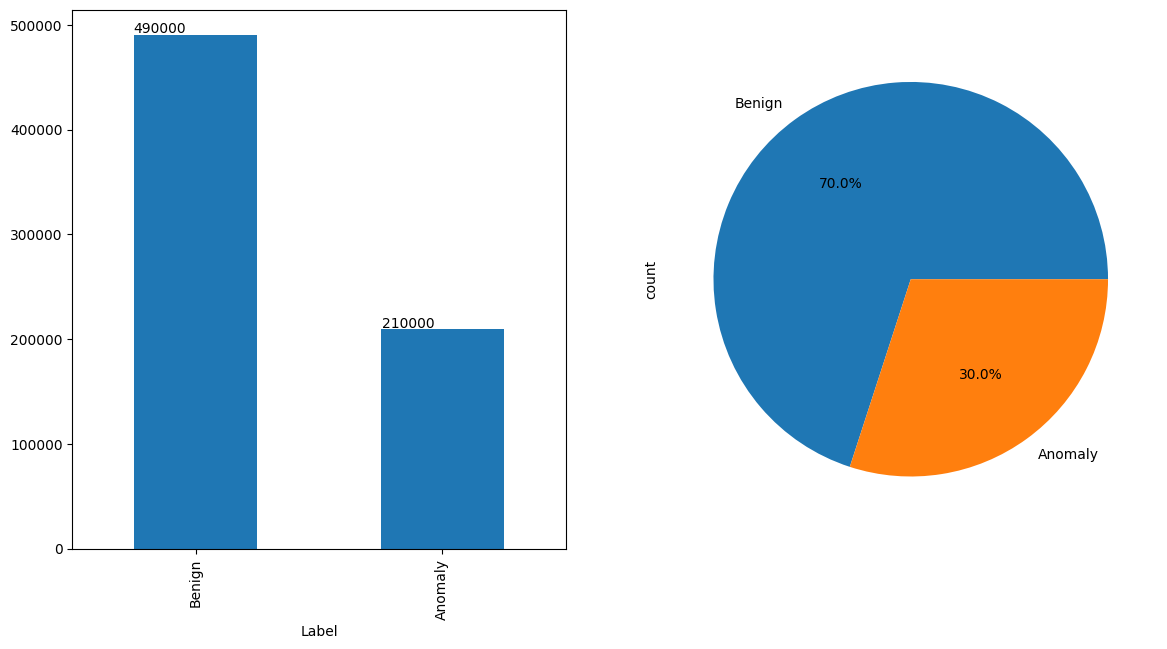

In [29]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Create the bar plot in the first subplot
axs[0] = data1new.Label.value_counts().plot(kind='bar', ax=axs[0])
for p in axs[0].patches:
    axs[0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Create the pie chart in the second subplot
axs[1] = data1new.Label.value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%')

plt.show()

# DATA 2 PROCESSING 03-01-2018

In [30]:
data2.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


In [31]:
data2.shape

(331125, 80)

In [32]:
# Identify categorical features in the dataset - Columns with datatype object
categorical_features = data2.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd B

## coverting to int and float
Convert a single column to numeric, errors='coerce' will turn non-numeric values into NaNs
1. df['ColumnName'] = pd.to_numeric(df['ColumnName'], errors='coerce')
Or use astype to convert to integer, but this will fail if there are any non-integer values
1. df['ColumnName'] = df['ColumnName'].astype(int)

In [33]:
c = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
     'Fwd Pkt Len Min', 'Bwd Pkt Len Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 
     'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkt Len Min', 'Pkt Len Min', 'Pkt Len Max', 'FIN Flag Cnt', 
     'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 
     'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
     'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 
     'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']

for col in c:
    data2[col] = pd.to_numeric(data2[col], errors='coerce')
    
# Replace NaN values with 0
data2 = data2.fillna(0)

data2[c] = data2[c].astype('int64')

In [36]:
c_ = ['TotLen Bwd Pkts', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 
      'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
      'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 
      'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Pkts/s', 'Bwd Pkts/s',
      'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 
      'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

for colu in c_:
    data2[colu] = pd.to_numeric(data2[colu], errors='coerce')
    
# Replace NaN values with 0
data2 = data2.fillna(0)

data2[c_] = data2[c_].astype('float64')

In [35]:
# Identify categorical features in the dataset - Columns with datatype object
categorical_features = data2.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Timestamp', 'Label']

In [37]:
data2.drop(columns='Timestamp', inplace=True)

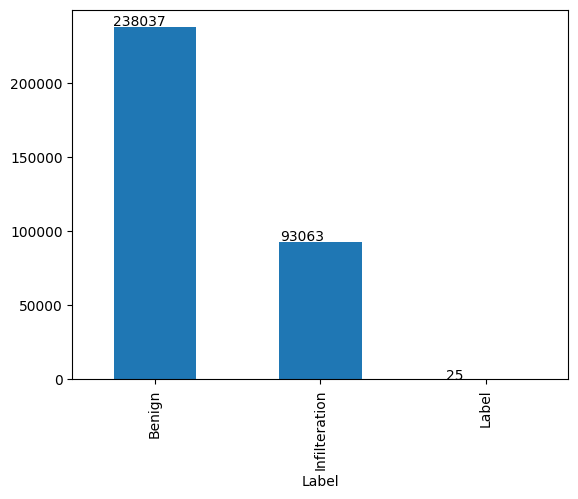

In [38]:
ax = data2.Label.value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [39]:
data2.Label.value_counts()

Label
Benign           238037
Infilteration     93063
Label                25
Name: count, dtype: int64

## removing rows
1. Remove rows where column 'ColumnName' is equal to 'Value'
2. Change 'ColumnName' and 'Value' to match your criteria

df = df[df['ColumnName'] != 'Value']

In [40]:
data2 = data2[data2['Label'] != 'Label']

In [41]:
data2.Label.value_counts()

Label
Benign           238037
Infilteration     93063
Name: count, dtype: int64

<Axes: ylabel='count'>

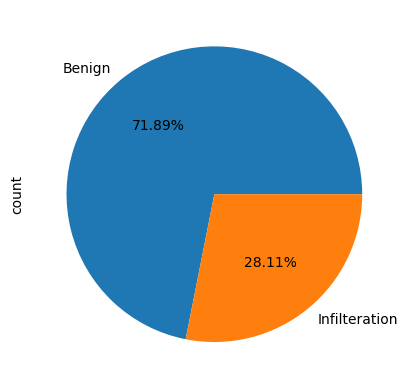

In [42]:
data2.Label.value_counts().plot.pie(autopct='%1.2f%%')

In [43]:
data2.Label.unique()

array(['Benign', 'Infilteration'], dtype=object)

In [44]:
mask20 = data2[data2['Label'] == 'Benign'].reset_index(drop=True)
mask21 = data2[data2['Label'] == 'Infilteration'].reset_index(drop=True)

In [45]:
mask20  = mask20.sample(frac=1, random_state=40).reset_index(drop=True)
mask20_new = mask20.drop(mask20.index[1:118038], axis=0).reset_index(drop=True)

mask21  = mask21.sample(frac=1, random_state=40).reset_index(drop=True)
mask21_new = mask21.drop(mask21.index[1:13064], axis=0).reset_index(drop=True)

data2new= pd.concat([mask20_new, mask21_new], axis=0).reset_index(drop=True)

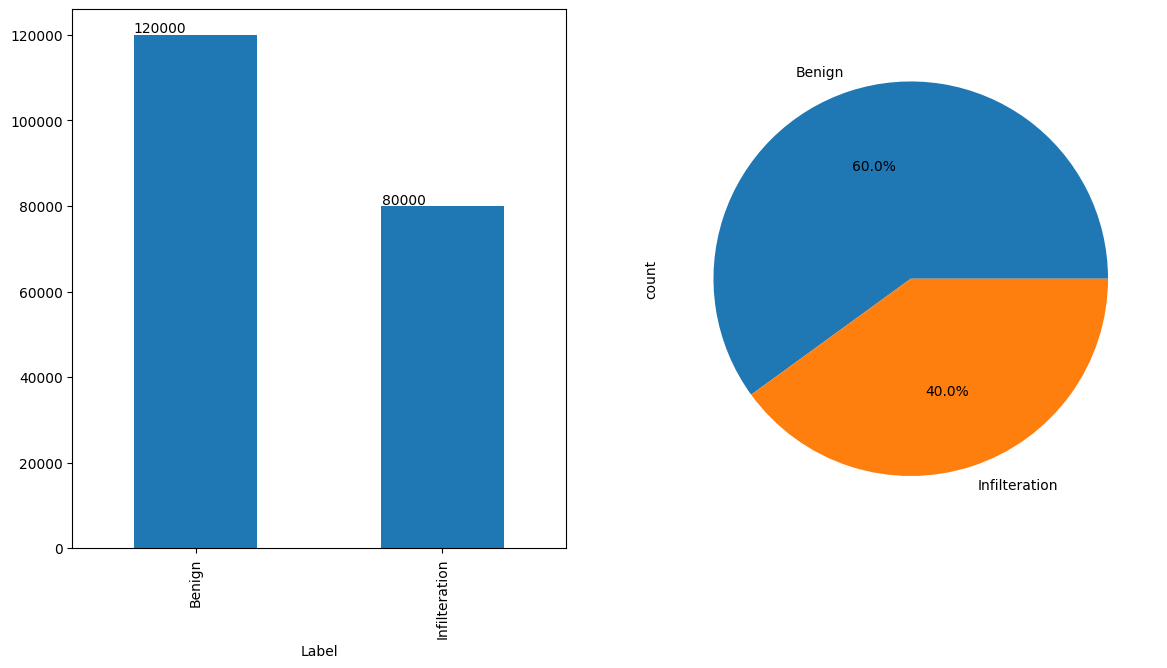

In [46]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Create the bar plot in the first subplot
axs[0] = data2new.Label.value_counts().plot(kind='bar', ax=axs[0])
for p in axs[0].patches:
    axs[0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Create the pie chart in the second subplot
axs[1] = data2new.Label.value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%')

plt.show()

# DATA 3 PROCESSING 03-02-2018

In [47]:
data3.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [48]:
data3.shape

(1048575, 80)

In [49]:
# Identify categorical features in the dataset - Columns with datatype object
categorical_features = data3.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Timestamp', 'Label']

In [50]:
data3.drop(columns='Timestamp', inplace=True)

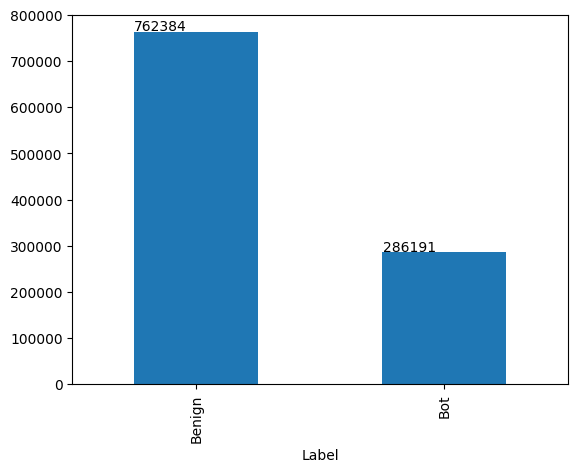

In [51]:
ax = data3.Label.value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [52]:
mask0 = data3[data3['Label'] == 'Benign'].reset_index(drop=True)
mask1 = data3[data3['Label'] == 'Bot'].reset_index(drop=True)

In [53]:
mask0_sh  = mask0.sample(frac=1, random_state=40).reset_index(drop=True)
mask0_new = mask0_sh.drop(mask0_sh.index[1:372385], axis=0).reset_index(drop=True)

In [54]:
mask1_sh  = mask1.sample(frac=1, random_state=40).reset_index(drop=True)
mask1_new = mask1_sh.drop(mask1_sh.index[1:76192], axis=0).reset_index(drop=True)

In [55]:
data3new= pd.concat([mask0_new, mask1_new], axis=0).reset_index(drop=True)

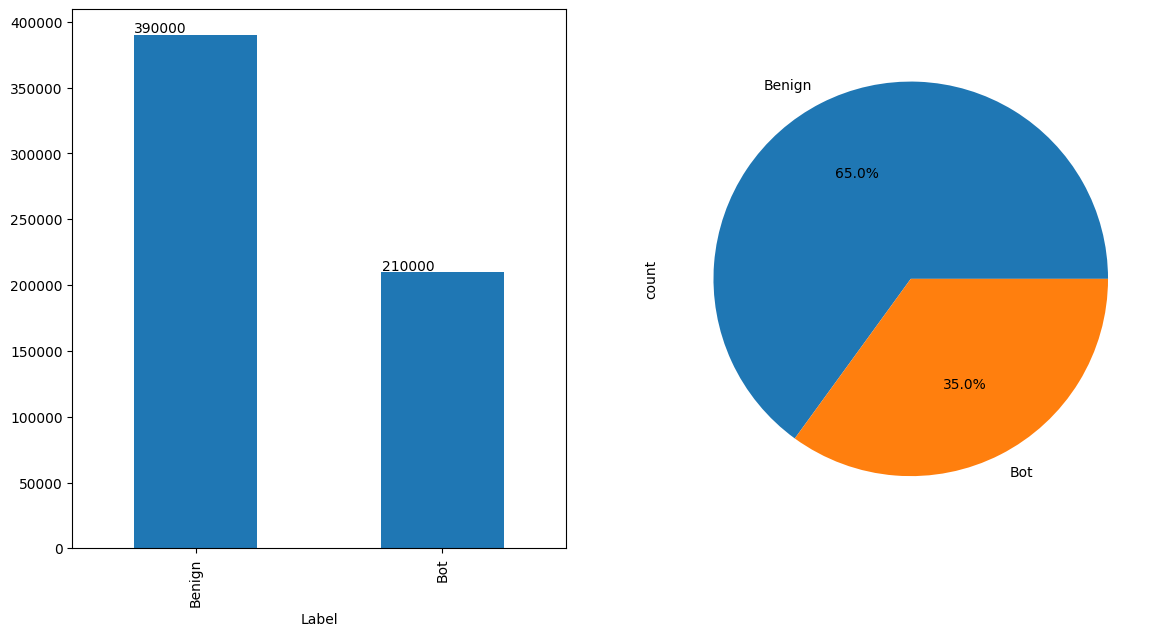

In [56]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Create the bar plot in the first subplot
axs[0] = data3new.Label.value_counts().plot(kind='bar', ax=axs[0])
for p in axs[0].patches:
    axs[0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Create the pie chart in the second subplot
axs[1] = data3new.Label.value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%')

plt.show()

# FINAL DATASET1 PROCESSES

In [57]:
data1new.shape

(700000, 79)

In [58]:
data2new.shape

(200000, 79)

In [59]:
data3new.shape

(600000, 79)

### converting to Benign and Anomaly

In [60]:
## converting to Benign and Anomaly

data1new.replace(to_replace=['FTP-BruteForce', 'SSH-Bruteforce', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
                'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Infilteration', 'Bot'],
           value = 'Anomaly', inplace=True)
data2new.replace(to_replace=['FTP-BruteForce', 'SSH-Bruteforce', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
                'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Infilteration', 'Bot'],
           value = 'Anomaly', inplace=True)
data3new.replace(to_replace=['FTP-BruteForce', 'SSH-Bruteforce', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
                'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Infilteration', 'Bot'],
           value = 'Anomaly', inplace=True)

In [61]:
data1new.Label.unique()

array(['Benign', 'Anomaly'], dtype=object)

In [62]:
data123 = pd.concat([data1new,data2new,data3new],axis=0).reset_index(drop=True)

In [63]:
data123.shape

(1500000, 79)

## checking for columns with zero

In [64]:
data123.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [65]:
columns = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']
summed = np.sum(data123[columns])

summed[summed == 0]

c:\Users\harik\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
data123.drop(columns=['Bwd PSH Flags','Bwd URG Flags','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg'],axis=1, inplace=True)

In [ ]:
data123

In [ ]:
data123.to_csv('dataset1.csv')

# END OF PROCESSING